In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

def load_df(file_name):
    df = pd.DataFrame(pd.read_pickle(file_name))
    return df

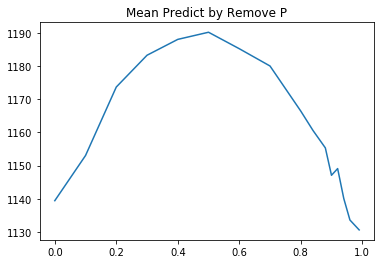

In [21]:
#load broad data and close up on high remove p data
er3 = load_df("compiled_output_jj6_random_digraph.pkl")
df1=er3.groupby(er3['remove_p']).aggregate(np.mean)
plt.plot(df1.index,df1["mean_pred"])
plt.title("Mean Predict by Remove P")
plt.show()
#Remove failed experiments
er3 = er3[er3['adj_size']>0]

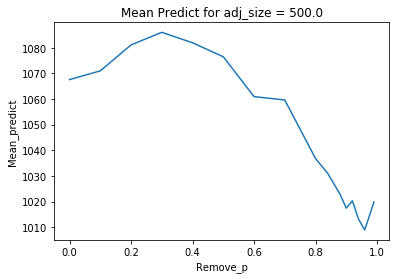

Average value for adj_size = 500.0 is 1047.2068001312555


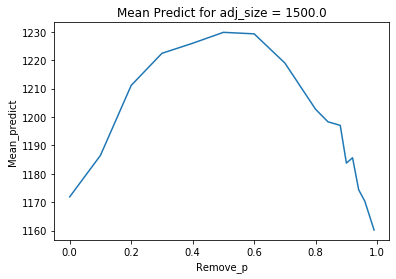

Average value for adj_size = 1500.0 is 1198.0390098436599


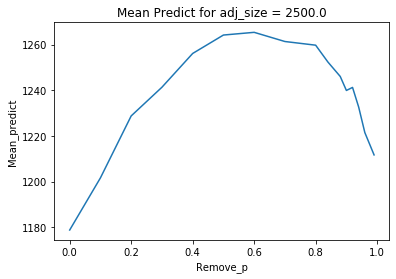

Average value for adj_size = 2500.0 is 1237.6760596409958


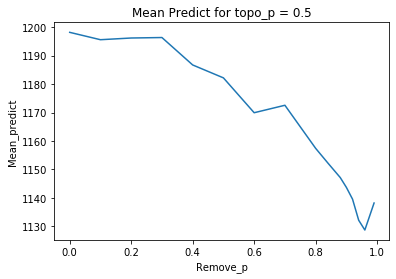

Average value for topo_p = 0.5 is 1164.8102854938272


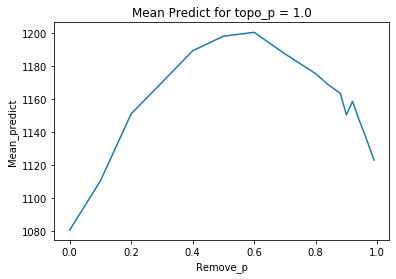

Average value for topo_p = 1.0 is 1157.1281980759109


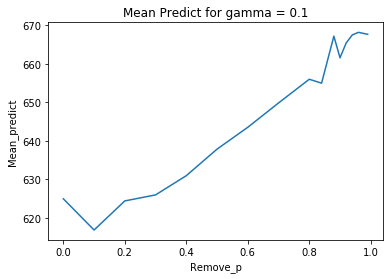

Average value for gamma = 0.1 is 647.7054774305556


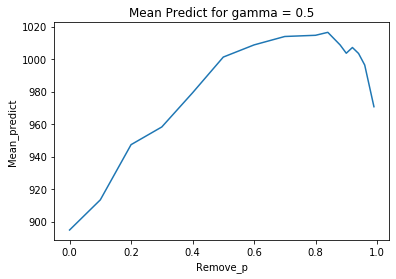

Average value for gamma = 0.5 is 983.7035734953705


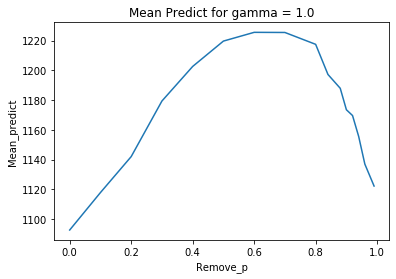

Average value for gamma = 1.0 is 1172.8913512731483


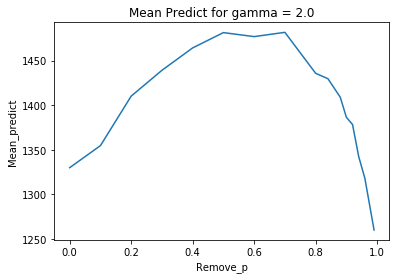

Average value for gamma = 2.0 is 1399.8911400462962


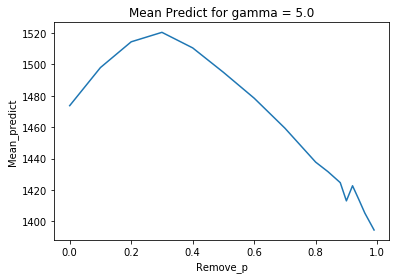

Average value for gamma = 5.0 is 1455.8166087962964


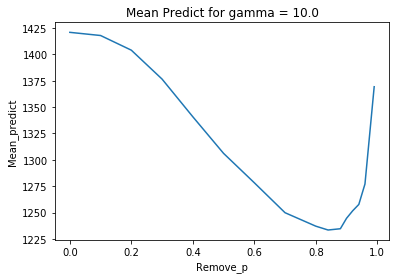

Average value for gamma = 10.0 is 1306.2449620443501


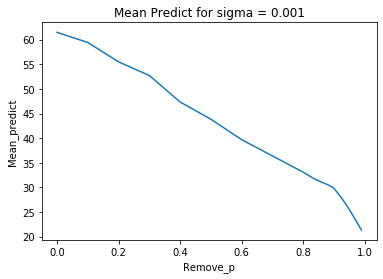

Average value for sigma = 0.001 is 38.90040219907408


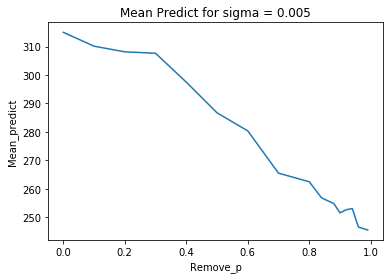

Average value for sigma = 0.005 is 274.6488512731482


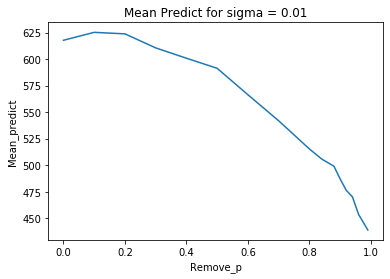

Average value for sigma = 0.01 is 538.9979340277779


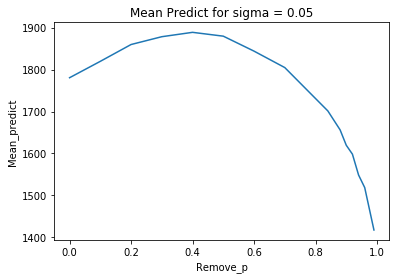

Average value for sigma = 0.05 is 1721.6850723379632


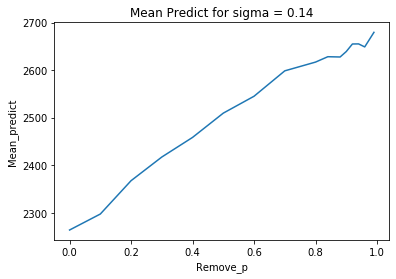

Average value for sigma = 0.14 is 2537.957144097222


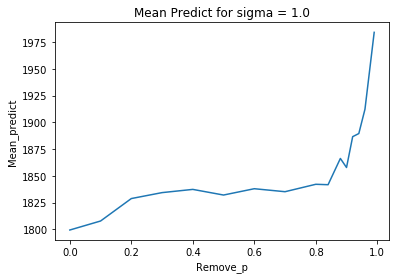

Average value for sigma = 1.0 is 1855.8526408212542


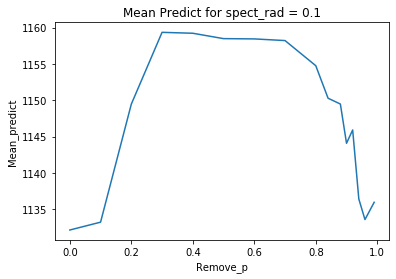

Average value for spect_rad = 0.1 is 1147.4463541666667


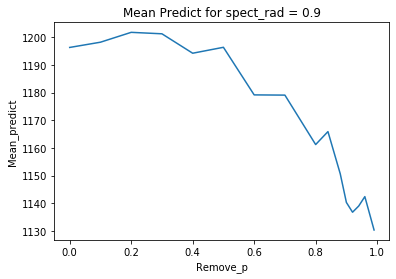

Average value for spect_rad = 0.9 is 1169.5454542824077


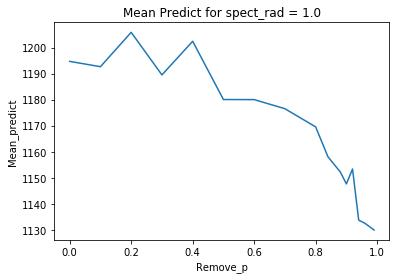

Average value for spect_rad = 1.0 is 1168.684754050926


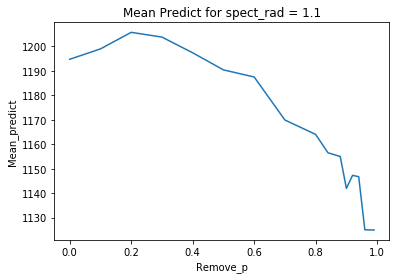

Average value for spect_rad = 1.1 is 1169.398553240741


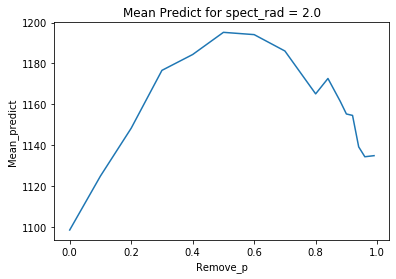

Average value for spect_rad = 2.0 is 1157.8744675925927


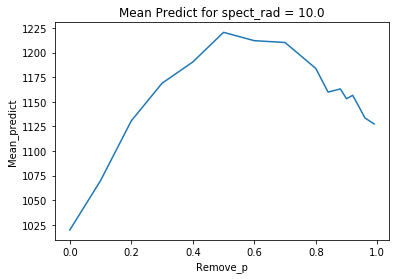

Average value for spect_rad = 10.0 is 1152.8599403448209


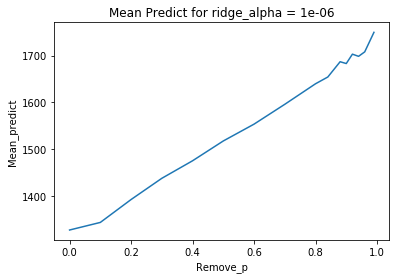

Average value for ridge_alpha = 1e-06 is 1572.8344593136744


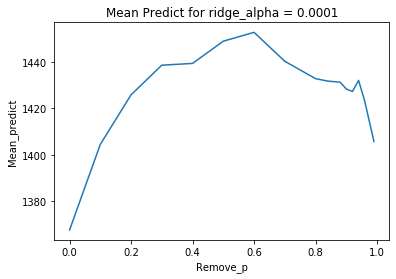

Average value for ridge_alpha = 0.0001 is 1426.8532118055555


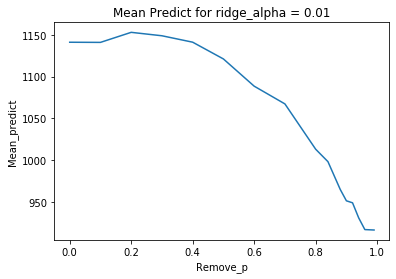

Average value for ridge_alpha = 0.01 is 1040.302762345679


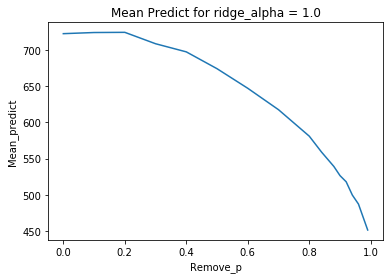

Average value for ridge_alpha = 1.0 is 604.801205632716


In [24]:
col = ['adj_size', 'topo_p', 'gamma', 'sigma',
       'spect_rad', 'ridge_alpha']
for i in col:
    for t in np.unique(er3[i]):
        df1=er3[er3[i]==t].groupby(er3['remove_p'][er3[i]==t]).aggregate(np.mean)
        plt.plot(df1.index,df1["mean_pred"])
        plt.title("Mean Predict for " + i + " = " + str(t))
        plt.xlabel("Remove_p")
        plt.ylabel("Mean_predict")
        plt.show()
        #I included this line so that I can compare easier the averages between graphs
        print("Average value for " + i + " = " + str(t) + " is " + str(np.mean(df1["mean_pred"])))

Conclusions:

adj_size: Remove p is more effective with the 1500 and 2500 size networks. It looks like the larger the network the longer remove_p can help before the prediction tanks.

topo_p: At topo_p 1 remove_p is useful, while at .5 it is strictly harmful. They both have a similar average mean though, so I we can't say .5 is a bad choice

gamma: Gamma exhibits very odd behavior. As Gamma increase the peak for mean predict moves towards a remove_p of zero. At Gamma of 10 the peak is at zero, but the graph has very odd behvaior, so I wouldn't draw to many conclusions.

sigma: Below .05 remove_p has a strictly negative effect, and a stricly positive effect above .05. The values below .05 also have very low mean predicts, and therefore aren't very valuable to us.

spect_rad: The end behavior of all the data is 1130 becuase of a bug in our code. Ignoring the behavior after remove_p is larger than 50% we see the odd behavoir of remove_p being effective as long as spectral radius is not near one.

ridge_alpha: Remove_p is more useful the smaller ridge_alpha is, beign strictly useful at the lowest ridge_alpha value and strictly harmful at the highest. Conviently Mean predict is best with a small ridge_alpha.
       
Confounding variables: This an admission of possible errors in my predictions. Interdepence between variables could be a major cause of errors. These conclusions may not hold for other topologies. This data was made with an error in our spectal radius calculator that caused some of the spectral radius not to be scaled. This could cause some issues in every hyperparameter, but definitley makes it conclusion about spectral radius difficult.

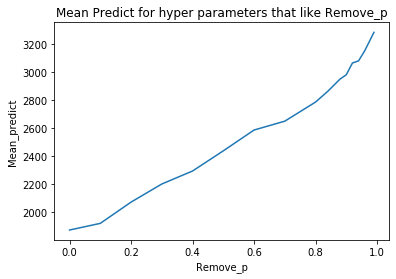

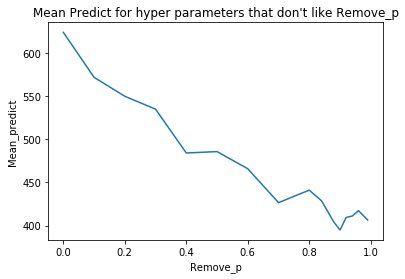

In [37]:
"""Below is a graph of mean predict for the dataset if we don't include values
that have strictly negative results on predict as remove_p increases"""
df1=er3[er3["ridge_alpha"]<.01][(er3["spect_rad"]>1.5) | (er3["spect_rad"]<.5)][er3["sigma"]>.05][er3["gamma"]!=10][er3["topo_p"]==1][er3["adj_size"]!=500].groupby(er3['remove_p'][er3["ridge_alpha"]<.01][(er3["spect_rad"]>1.5) | (er3["spect_rad"]<.5)][er3["sigma"]>.05][er3["gamma"]!=10][er3["topo_p"]==1][er3["adj_size"]!=500]).aggregate(np.mean)
plt.plot(df1.index,df1["mean_pred"])
plt.title("Mean Predict for hyper parameters that like Remove_p")
plt.xlabel("Remove_p")
plt.ylabel("Mean_predict")
plt.show()
df1=er3[er3["ridge_alpha"]>=.01][(er3["spect_rad"]<1.5) & (er3["spect_rad"]>.5)][er3["sigma"]<=.05][er3["gamma"]==10][er3["topo_p"]!=1][er3["adj_size"]==500].groupby(er3['remove_p'][er3["ridge_alpha"]>=.01][(er3["spect_rad"]<1.5) & (er3["spect_rad"]>.5)][er3["sigma"]<=.05][er3["gamma"]==10][er3["topo_p"]!=1][er3["adj_size"]==500]).aggregate(np.mean)
plt.plot(df1.index,df1["mean_pred"])
plt.title("Mean Predict for hyper parameters that don't like Remove_p")
plt.xlabel("Remove_p")
plt.ylabel("Mean_predict")
plt.show()

These might not be the best hyperparameters for prediction, but it does prove the concept that there are hyperparameters which remove_p will help. The second graph is lower because several of the lowest predicting hyperparameters got worse as remove_p increased. There are some good hyperparamaters that get worse as we increase remove_p.

Final conclusion between both data set.
Remove_p works better with low ridge_alpha and high sigma. It seems that there might be other effects in common, but these were the clear conclusions.